## https://tinyurl.com/ANLPColab3Part3
Go to "File" -> "Save a Copy in Drive..." This lets you create your own copy of the notebook in your Google drive, and any changes you make doesn't impact the shared notebook

### Load dataset

There are three different packages in Python to perform sentiment analysis:
1. TextBlob
2. VADER
3. SentiWordNet

We will use TextBlob package in class to perform sentiment analysis on a popular dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Data Science/Spring 2024/ANLP/Week 3/Reddit_Data.csv')
df.head(5)

Mounted at /content/drive


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape #dataset contains a total of 37249 rows

(37249, 2)

In [4]:
df.category.value_counts() #shows the count of each category

,count
category,
1,15830
0,13142
-1,8277


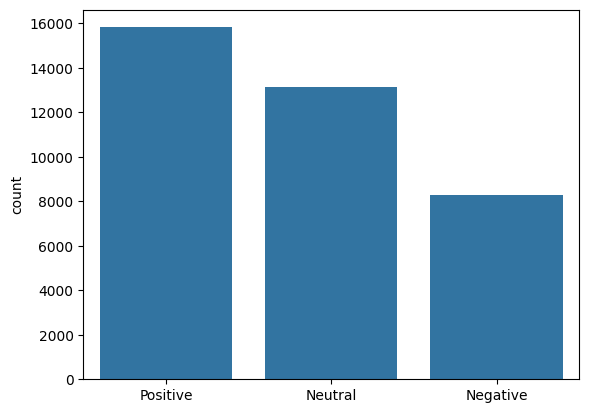

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualising sentiment categories
labels=['Positive','Neutral','Negative']
sns.barplot(x=labels,y=df.category.value_counts())
plt.show()

## Preprocessing the data

In [6]:
df.isna().sum() #Finding empty rows

,0
clean_comment,100
category,0


In [7]:
df = df.dropna() #Removign empty rows from the datset
df.isna().sum()

,0
clean_comment,0
category,0


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import string
import re
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

lemma_ = nltk.WordNetLemmatizer() #for lemmatization
# pstem = nltk.PorterStemmer() #for stemming

def cleanData(text):

    # To convert the all uppercase to lowercase
    text = text.lower()

    # This is a reguglar expression to replace anything char that is not alphabet or numeric.
    text = re.sub(r"[^A-Za-z0-9]",' ', text)

    # The above regular expression itself will take care of punctuation, below is an alternative to remove only punctuation.
    text = ''.join([char for char in text if char not in string.punctuation])

    # Lemmatization
    text = [lemma_.lemmatize(word) for word in text.split(' ') if ((word not in stopwords.words('english')) & len(word)!=0)]

    # Let's try without stemming
    # text = [pstem.stem(word) for word in text.split(' ') if ((word not in stopwords.words('english')) & len(word)!=0)]

    return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [9]:
#Clean the dataset by applying the fuction
df['clean_comment'] = df['clean_comment'].apply(cleanData)

In [10]:
df.head(5)

,clean_comment,category
0,never tried explain still stare puzzled strang...,1
1,lot considering sin suffering thing suffering ...,1
2,seriously say thing first get complex explain ...,-1
3,learned teach different focus paper without,0
4,benefit may thich might discussion loved paral...,1


## Sentiment Analysis using TextBlob

TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

The two measures that are used to analyze the sentiment are:

* Polarity – talks about how positive or negative the opinion is. Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)
* Subjectivity – talks about how subjective the opinion is. Subjectivity ranges from 0 to 1(0 being very objective and 1 being very subjective)

We can use TextBlob(text).sentiment to get the Polarity and Subjectivity values.

In [11]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(sentiment):
    return TextBlob(sentiment).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(sentiment):
        return TextBlob(sentiment).sentiment.polarity

# function to analyze the sentiment)
def analysis(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

In [12]:
textBlob = pd.DataFrame(df[['clean_comment','category']])
textBlob['Subjectivity'] = textBlob['clean_comment'].apply(getSubjectivity)
textBlob['Polarity'] = textBlob['clean_comment'].apply(getPolarity)
textBlob['Analysis'] = textBlob['Polarity'].apply(analysis)
textBlob.head()

,clean_comment,category,Subjectivity,Polarity,Analysis
0,never tried explain still stare puzzled strang...,1,0.225000,0.025000,1
1,lot considering sin suffering thing suffering ...,1,0.463228,0.124339,1
2,seriously say thing first get complex explain ...,-1,0.480000,-0.176667,-1
3,learned teach different focus paper without,0,0.600000,0.000000,0
4,benefit may thich might discussion loved paral...,1,0.650568,-0.014205,-1


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Evaluation metrics:\n",classification_report(textBlob['category'],textBlob['Analysis']))
print("\nAccuracy is:\n",accuracy_score(textBlob['category'],textBlob['Analysis']))
print("\nConfusion Matrix:\n",confusion_matrix(textBlob['category'],textBlob['Analysis']))

Evaluation metrics:
               precision    recall  f1-score   support

          -1       0.69      0.52      0.59      8277
           0       0.59      0.98      0.74     13042
           1       0.90      0.53      0.67     15830

    accuracy                           0.69     37149
   macro avg       0.73      0.68      0.67     37149
weighted avg       0.75      0.69      0.68     37149


Accuracy is:
 0.6867748795391532

Confusion Matrix:
 [[ 4305  3142   830]
 [  152 12828    62]
 [ 1789  5661  8380]]


In [ ]:
print(textBlob.category.value_counts())
print(textBlob.Analysis.value_counts())

category
 1    15830
 0    13042
-1     8277
Name: count, dtype: int64
Analysis
 0    21631
 1     9272
-1     6246
Name: count, dtype: int64
